In [6]:
import pandas as pd

from plv.data import load_verbraucherpreisindex
from plv.plot import plot_ts

# Load

In [7]:
data = load_verbraucherpreisindex(filter_columns=None)
data = data[data["inflation"].notna()].copy()

# Plot

In [10]:
# plot_ts(data["inflation"])

In [3]:
import matplotlib.pyplot as plt

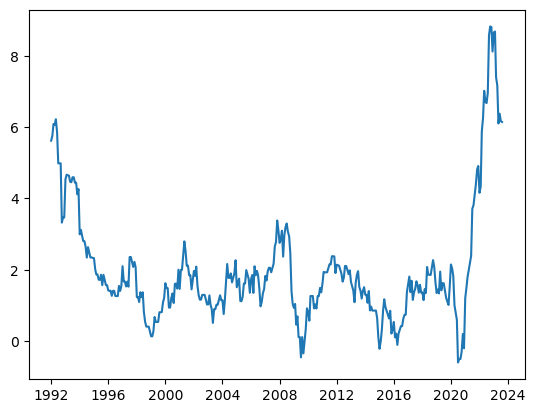

In [4]:
plt.plot(data.index, data["inflation"])

In [113]:
data["inflation"].tail(20)

dt
2022-01-01    4.158416
2022-02-01    4.330709
2022-03-01    5.876592
2022-04-01        6.25
2022-05-01    7.017544
2022-06-01    6.705539
2022-07-01    6.673114
2022-08-01    6.956522
2022-09-01    8.574181
2022-10-01    8.820709
2022-11-01    8.803828
2022-12-01    8.118434
2023-01-01     8.65019
2023-02-01    8.679245
2023-03-01    7.400555
2023-04-01    7.169118
2023-05-01    6.102004
2023-06-01    6.375228
2023-07-01    6.165005
2023-08-01    6.142728
Freq: MS, Name: inflation, dtype: Float64

# Investigate PACF

In [39]:
filter_ = slice("1995", "2020")

In [40]:
data.loc[filter_]

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,2_Auspraegung_Label,PREIS1__Verbraucherpreisindex__2020=100,PREIS1__CH0004,PREIS1__CH0005,vpi,inflation,monthly_Inflation
dt,,,,,,,,,,,,,,,,,,,
1996-01-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT01,Januar,71.4,"1,4","0,3",71.4,1.420455,0.280899
1996-02-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT02,Februar,71.8,"1,4","0,6",71.8,1.412429,0.560224
1996-03-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT03,März,71.8,"1,4",-,71.8,1.412429,0.0
1996-04-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT04,April,71.8,"1,3",-,71.8,1.269394,0.0
1996-05-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1996,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT05,Mai,71.9,"1,4","0,1",71.9,1.410437,0.139276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT08,August,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-09-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT09,September,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-10-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT10,Oktober,99.9,"-0,3","0,2",99.9,-0.299401,0.200602


In [41]:
y = data.loc[filter_, "inflation"]

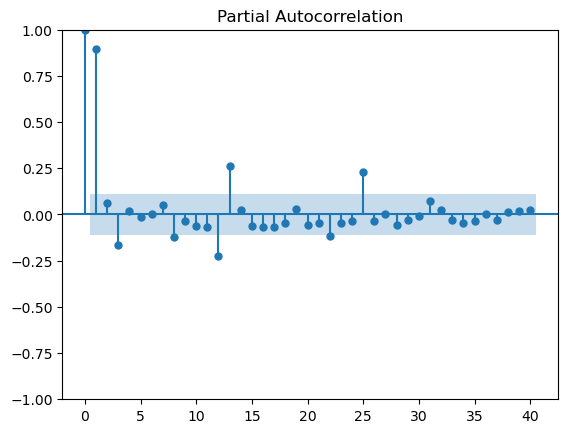

1     1.000000
2     0.900799
3     0.062090
4    -0.170082
5     0.018538
6    -0.012690
7     0.004763
8     0.057152
9    -0.127973
10   -0.038654
11   -0.066216
12   -0.075511
13   -0.240825
14    0.286118
15    0.029229
16   -0.076013
17   -0.076123
18   -0.072868
19   -0.054285
20    0.037677
21   -0.063093
22   -0.050849
23   -0.128284
24   -0.056049
25   -0.047304
dtype: float64

In [43]:
from statsmodels.tsa.stattools import pacf, acf
import statsmodels.api as sm
import matplotlib.pyplot as plt
y
sm.graphics.tsa.plot_pacf(y, lags=40, method="ywm")
plt.show()
p = pacf(y)
pd.Series(p, index=range(1, len(p) +1 ))

# ACF

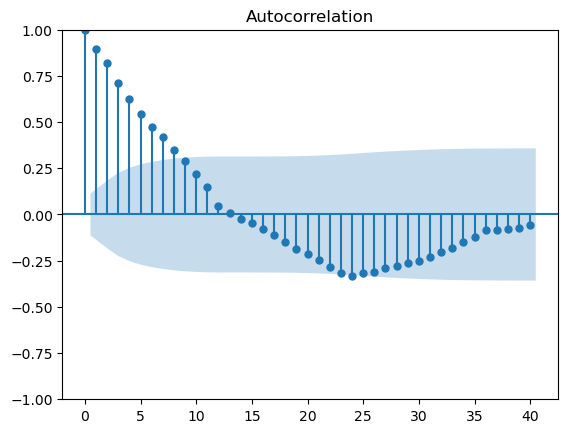

1     1.000000
2     0.897796
3     0.817659
4     0.712240
5     0.626523
6     0.542628
7     0.472758
8     0.419871
9     0.350767
10    0.289498
11    0.218212
12    0.147894
13    0.044124
14    0.009140
15   -0.026963
16   -0.048229
17   -0.079736
18   -0.112247
19   -0.147921
20   -0.185704
21   -0.215469
22   -0.245282
23   -0.283074
24   -0.317502
25   -0.330879
dtype: float64

In [45]:
sm.graphics.tsa.plot_acf(y, lags=40)
plt.show()
p = acf(y)
pd.Series(p, index=range(1, len(p) +1 ))

# Seasonality

In [55]:
import statsmodels.api as sm
def plot_seasonality(data: pd.Series, freq="MS"):
    "Seasonality plot of data"
    # this is necessary because otherwise sm.graphics.tsa.month_plot(y) throws an error
    # Turn the dtype Float64 of y into float64 
    index = pd.DatetimeIndex(data.index, freq=freq)
    y = pd.Series(index=index, data=data.to_numpy().astype(float))
    fig = sm.graphics.tsa.month_plot(y)
    return fig

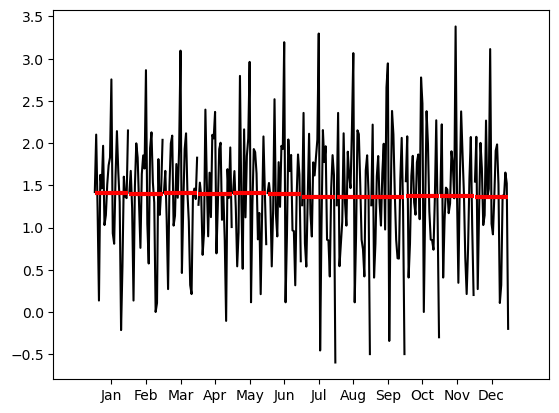

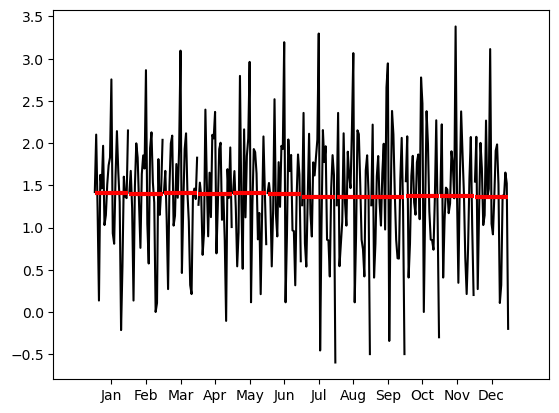

In [56]:
plot_seasonality(data.loc[slice(None, "2020"), "inflation"])

In [52]:
data.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='dt', length=332, freq='MS')

matplotlib.figure.Figure

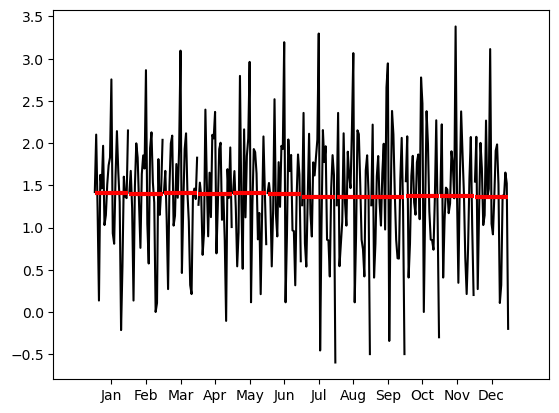

In [53]:
import statsmodels.api as sm

y = pd.Series(index=data.index, data=data["inflation"].to_numpy().astype(float))
y = y.loc[slice(None, "2020")]
fig = sm.graphics.tsa.month_plot(y)
type(fig)

## Example with seasonality

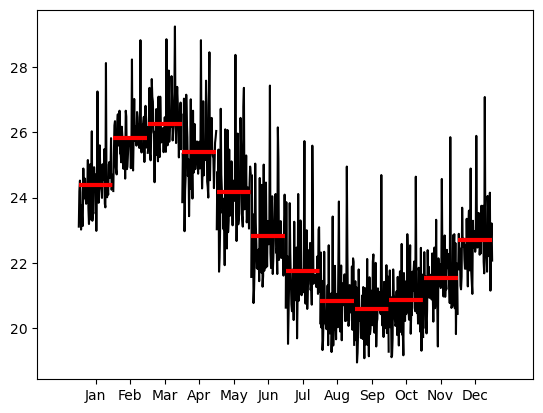

In [38]:
dta = sm.datasets.elnino.load_pandas().data
dta['YEAR'] = dta.YEAR.astype(int).astype(str)
dta = dta.set_index('YEAR').T.unstack()
dates = pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1',
                                dta.index.values)))
dta.index = pd.DatetimeIndex(dates, freq='MS')
fig = sm.graphics.tsa.month_plot(dta)

# Zusammenhang Prozess und Daten

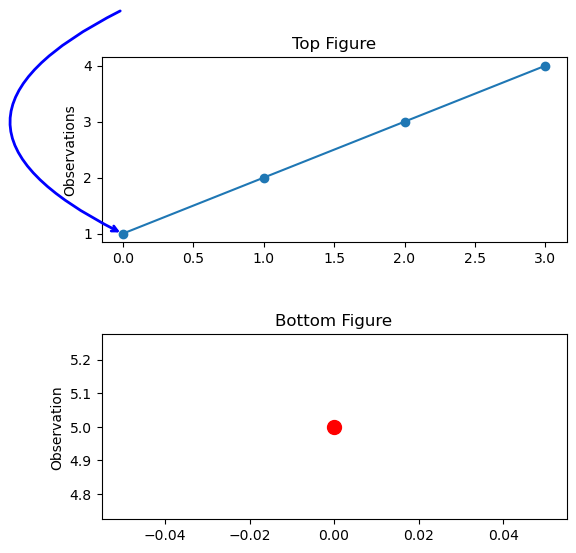

In [38]:
import matplotlib.pyplot as plt

# Sample data for four observations
top_data = [1, 2, 3, 4]
bottom_data = [5]

# Create a figure with two subplots (one on top, one on bottom)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))  # Adjust figsize as needed

# Plot the top subplot with four observations
ax1.plot(range(4), top_data, marker='o', linestyle='-')
ax1.set_title('Top Figure')
ax1.set_ylabel('Observations')

# Plot the bottom subplot with one observation
ax2.plot(0, bottom_data[0], marker='o', markersize=10, color='red')
ax2.set_title('Bottom Figure')
ax2.set_ylabel('Observation')

# Add an arrow connecting the first observation in the top subplot
arrowprops = dict(arrowstyle='->', connectionstyle='arc3,rad=1', lw=2, color='blue')
ax1.annotate('', xy=(0, top_data[0]), xytext=(0, bottom_data[0]), arrowprops=arrowprops)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

# AR Simulation

## Using statsmodels -> cannot set initial value

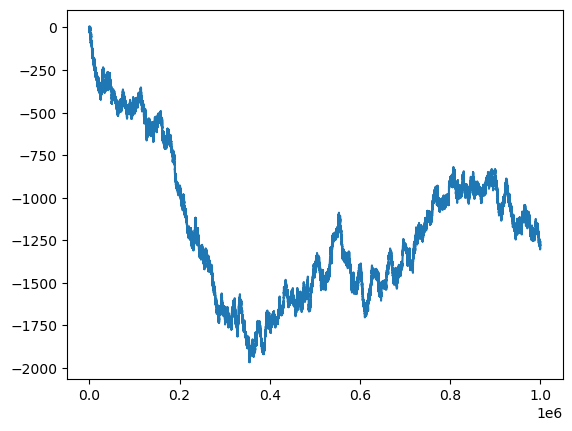

In [71]:
from statsmodels.tsa.arima_process import ArmaProcess, arma_generate_sample
import matplotlib.pyplot as plt

plt.plot(arma_generate_sample([1, -1], [1], 1000000))

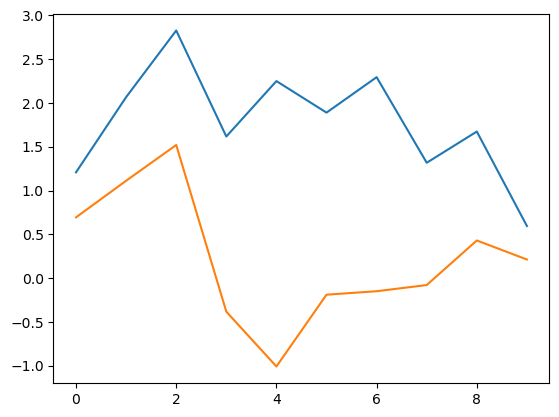

In [98]:
n = int(1e4)
n = 10
r = 2
plt.plot(arma_generate_sample([1, -0.9], [1], (n, r)));

## Manual

In [104]:
a = 0.9
exponents = np.arange(n)
a_vector = np.power(a, exponents)

mean = 0  # Mean of the normal distribution
std_dev = 1  # Standard deviation of the normal distribution
num_samples = 100  # Number of random samples to generate

# Generate random numbers from a normal distribution
U = np.random.normal(mean, std_dev, (n, r))
res = a_vector @ U


In [105]:
a_vector.T.shape

(10,)

In [106]:
res.shape

(2,)

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

In [111]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]